### Code segments and images are collected online for educational purposes

#### UH SPEC DSPC 19/02/2025

#### Image classification

In [1]:
#!pip install torchvision
#!pip install opencv-python

In [10]:
import torch
import torchvision.transforms as transforms
from torchvision import models, datasets
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

classification_model = models.resnet50(pretrained=True).to(device)
classification_model.eval()

image_path = "cat.jpg"
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = classification_model(image_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())

Predicted class: 285


In [11]:
import json
import requests

LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(LABELS_URL).text.split("\n")

class_label = labels[285] 
print("Predicted class label:", class_label)

Predicted class label: Egyptian cat


#### Object detection

###### https://lopezyse.medium.com/computer-vision-object-detection-with-python-14b241f97fd8

In [12]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image, ImageDraw, ImageFont
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

detection_model = models.detection.ssd300_vgg16(weights=models.detection.SSD300_VGG16_Weights.DEFAULT).to(device).eval()

LABELS = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep",
    "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase",
    "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "TV", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

image = Image.open("objects.jpg").convert("RGB")
orig_size = image.size  # Store original size
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    predictions = detection_model(image_tensor)[0]

scale_x = orig_size[0] / 300
scale_y = orig_size[1] / 300

draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
for box, score, label in zip(predictions["boxes"], predictions["scores"], predictions["labels"]):
    if score > 0.5:
        box = box.cpu().detach().numpy()
        box = [box[0] * scale_x, box[1] * scale_y, box[2] * scale_x, box[3] * scale_y]  # Rescale boxes
        draw.rectangle(box, outline="red", width=3)
        label_text = LABELS[label] if label < len(LABELS) else "Unknown"
        draw.text((box[0], box[1]), f"{label_text}: {score:.2f}", fill="red", font=font)

image.show()


Opening in existing browser session.


#### Resize

1015 672


Text(0.5, 1.0, 'Resized Image')

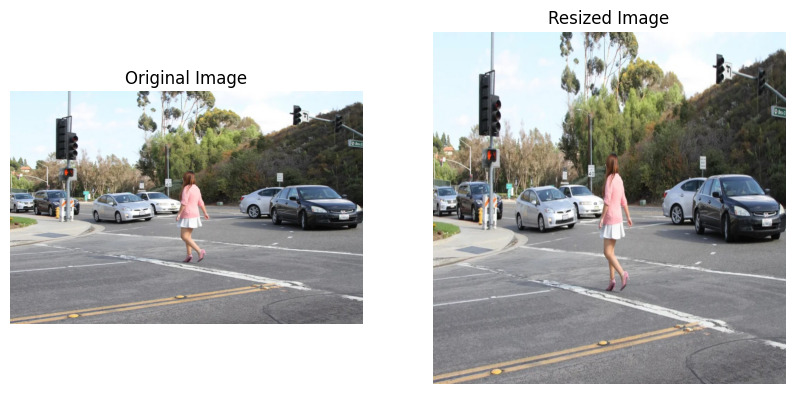

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_name = "objects.jpg"
image = Image.open(image_name).convert("RGB")
w, h= image.size
print(w, h)

resized_image = image.resize((1056, 1056))

#image_np = np.array(image)
#resized_image_np = np.array(resized_image)

resized_name = "resized.jpg"
resized_image.save(resized_name)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(resized_image)
axes[1].axis("off")
axes[1].set_title("Resized Image")

#plt.show()

#### Rotation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

image_path = "objects.jpg"
image = Image.open(image_path).convert("RGB")

#angle = random.randint(0, 360)
angle = 270
rotated_image = image.rotate(angle)

image_np = np.array(image)
rotated_image_np = np.array(rotated_image)

rotated_path = "rotated.jpg"
rotated_image.save(rotated_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(rotated_image_np)
axes[1].axis("off")
axes[1].set_title(f"Rotated Image ({angle}°)")

plt.show()

#### Gaussian noise

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_name = "objects.jpg"
image = Image.open(image_name).convert("RGB")
image_np = np.array(image)

row, col, ch = image_np.shape
print(row, col, ch)
mean = 10
sigma = 10
gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.uint8)
noisy_image = cv2.add(image_np, gauss)

noisy_name = "gaussian_noise.jpg"
cv2.imwrite(noisy_name, cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(noisy_image)
axes[1].axis("off")
axes[1].set_title("Gaussian Noisy Image")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util

image  = io.imread('objects.jpg')
noise_img = util.random_noise(image, mode = 's&p', amount = 0.05)

plt.imshow(noisy_image)
plt.axis("off")
plt.title("S&P Noisy Image")

#### Remove noise

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_name = "gaussian_noise.jpg"  
noisy_image = cv2.imread(image_name)
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

denoised_image = cv2.GaussianBlur(noisy_image, (3, 3), 0)

denoised_path = "denoised_gaussian.jpg"
cv2.imwrite(denoised_path, cv2.cvtColor(denoised_image, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(noisy_image)
axes[0].axis("off")
axes[0].set_title("Gaussian Noisy Image")

axes[1].imshow(denoised_image)
axes[1].axis("off")
axes[1].set_title("Denoised Image (Gaussian Blur)")

#### Brightness adjusted

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

image_name = "objects.jpg"
image = Image.open(image_name).convert("RGB")

enhancer = ImageEnhance.Brightness(image)
brightness_adjusted = enhancer.enhance(1.5)  

image_np = np.array(image)
brightness_adjusted_np = np.array(brightness_adjusted)

brightened_img = "brightness.jpg"
brightness_adjusted.save(brightened_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(brightness_adjusted_np)
axes[1].axis("off")
axes[1].set_title("Brightness Adjusted Image")

#### Contrast Adjusted

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

image_name = "objects.jpg"
image = Image.open(image_name).convert("RGB")

enhancer = ImageEnhance.Contrast(image)
contrast_adjusted = enhancer.enhance(1.5)  

image_np = np.array(image)
contrast_adjusted_np = np.array(contrast_adjusted)

contrast_img = "contrast.jpg"
contrast_adjusted.save(contrast_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_np)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(contrast_adjusted_np)
axes[1].axis("off")
axes[1].set_title("Contrast Adjusted Image")

#### Flipped horizontally

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_name = "objects.jpg"
image = Image.open(image_name).convert("RGB")

flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

flipped_img = "flipped_horizontal.jpg"
flipped_image.save(flipped_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis("off")
axes[0].set_title("Original Image")

axes[1].imshow(flipped_image)
axes[1].axis("off")
axes[1].set_title("Flipped Horizontally")

#### Image segmentation

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import gc  


device = torch.device("cpu")

segmentation_model = models.segmentation.deeplabv3_mobilenet_v3_large(
    weights=models.segmentation.DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT
).to(device).eval()

for param in segmentation_model.parameters():
    param.requires_grad = False

image_path = "objects.jpg"  
image = Image.open(image_path).convert("RGB")
orig_size = image.size  

resize_dim = (256, 256)  
transform = transforms.Compose([
    transforms.Resize(resize_dim), 
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = segmentation_model(image_tensor)["out"][0]  

del image_tensor
gc.collect()


segmentation_mask = torch.argmax(output, dim=0).cpu().numpy()

segmentation_mask = (segmentation_mask / segmentation_mask.max() * 255).astype(np.uint8)

segmentation_mask = cv2.resize(segmentation_mask, orig_size, interpolation=cv2.INTER_NEAREST)


image_cv = np.array(image)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR) 
colored_mask = cv2.applyColorMap(segmentation_mask, cv2.COLORMAP_JET)


blended_image = cv2.addWeighted(image_cv, 0.6, colored_mask, 0.4, 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))  
ax[0].axis("off")
ax[0].set_title("Original Image")

ax[1].imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))  
ax[1].axis("off")
ax[1].set_title("Segmented Image")

plt.show()

output_path = "segmented_output.jpg"
cv2.imwrite(output_path, blended_image)

print(f"Segmented image saved as {output_path}.")
